Deep Learning 2nd Semester 2024SoSe

hier schön machen

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

batch_size = 2

trainset = torchvision.datasets.ImageFolder(root="./data/train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root="./data/test", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)



In [4]:
classes = ('fractured', 'notFractured')

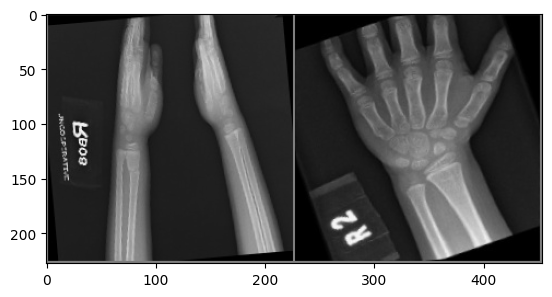

fractured notFractured


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [28]:
#2. Define a Convolutional Neural Network

class Net(nn.Module):
    ''' Models a simple Convolutional Neural Network'''
	
    def __init__(self):
        ''' initialize the network '''
        super(Net, self).__init__()
        # 3 input image channel, 6 output channels, 
        # 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)# 5x5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        ''' the forward propagation algorithm '''
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [29]:
#3. Define a Loss function and optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [32]:
# forward + backward + optimize
outputs = net(inputs)

print(outputs.shape)  # Add this line to print the shape of the output tensor
loss = criterion(outputs, labels)

RuntimeError: shape '[-1, 400]' is invalid for input of size 89888

In [30]:



for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0



# Waits for everything to finish running
torch.cuda.synchronize()

print('Finished Training')


RuntimeError: shape '[-1, 400]' is invalid for input of size 89888

# 🦴 Deep Learning for Fracture Detection in X-Rays 📸

## Introduction

Broken bones are a common occurrence in hospital emergency rooms worldwide. Our skeletal system provides structure and stability to our bodies, with muscles connecting to bones to facilitate movement. Joints connect bones, enabling specific movements while maintaining overall stability.

### Context 🏥

Diagnosing fractures can be challenging. Externally, it is often difficult to confirm a broken bone unless there are clear indicators such as new joints forming where they shouldn't or bone pieces protruding through the skin. In most cases, however, the skin remains intact, making visual diagnosis unreliable.

### The Role of X-Rays 🩻

X-rays revolutionize the diagnosis process by allowing doctors to visualize bone structures beneath the skin. However, interpreting X-rays accurately can be demanding, and even experienced doctors might overlook minor fractures when focusing on more obvious ones.

### The Plan 🚀

To assist doctors in identifying fractures more accurately, this project aims to develop a deep learning model trained to detect fractures in X-ray images. The steps include:

1. **Data Collection**: Gather a comprehensive dataset of X-ray images, including both fractured and non-fractured bones.
2. **Data Preprocessing**: Clean and annotate the images to prepare them for model training.
3. **Model Selection**: Choose an appropriate deep learning architecture optimized for image classification tasks.
4. **Training and Evaluation**: Train the model on the dataset and evaluate its performance using standard metrics like accuracy, sensitivity, and specificity.


### Purpose and Value 🌟

The primary goal of this project is to enhance the accuracy and efficiency of fracture detection in X-rays, providing significant value to hospitals and patients alike:

- **Improved Diagnostic Accuracy**: Assists doctors in identifying fractures, including minor ones that might be easily overlooked.
- **Enhanced Patient Care**: Ensures prompt and accurate treatment, reducing the risk of complications from undiagnosed fractures.
- **Support for Medical Staff**: Acts as a second opinion, helping less experienced doctors make accurate diagnoses.

While the immediate value lies in improved patient outcomes and support for medical staff, the broader impact is on the overall efficiency and reliability of medical diagnostics in emergency care settings.


# 🗂️ Task 2 - The Data

The dataset contains X-rays of various bones of the body, separated into fractured and not fractured categories. The images are widely rotated and provided in different resolutions.

The data originates from **Madushani Rodrigo**, who combined different datasets into a comprehensive one. The dataset was originally uploaded to Kaggle. I reviewed the work conducted with this dataset and couldn't find related work to my research topic, nor did I take inspiration from any of them.

The data can be downloaded here: [Fracture Multi-Region X-ray Data](https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data/data)


In [1]:
# importing required libs
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import os


In [19]:
# loading the data

# Define the transformation for image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to (128, 128)
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)),  # Normalize the image
])

# Create the trainset using the ImageFolder dataset
trainset = torchvision.datasets.ImageFolder(root="./data/train", transform=transform)
# Create the trainloader to load the trainset in batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2, shuffle=True, num_workers=2)

# Create the testset using the ImageFolder dataset
testset = torchvision.datasets.ImageFolder(root="./data/test", transform=transform)
# Create the testloader to load the testset in batches
testloader = torch.utils.data.DataLoader(testset, batch_size=2, shuffle=False, num_workers=2)

# Define the classes for classification
classes = ('fractured', 'notFractured')

👀 Taking a Look at the Data

The following function will be used to display the images:

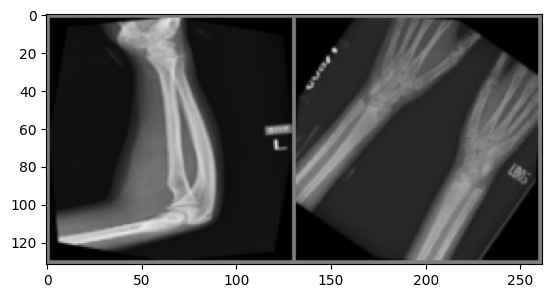

notFractured fractured


In [28]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))


On the left, you can see non-fractured humerus, ulna, and radius bones. In the right picture, a fractured ossa carpi can be seen.

<img src="https://static.vecteezy.com/system/resources/previews/001/166/070/large_2x/human-arm-skeletal-anatomy-diagram-vector.jpg" width="50%">



# Task 3 – IDA

## Project Sample Size

The sample size of this project consists of approximately 1000 test images and approximately 18000 train images. The fracture and not fractured samples are evenly split, with the not fractured images slightly oversampled by 2.78%.

### Oversampling Consideration

Oversampling can become a significant problem leading to overfitting and loss of generalization. However, since the train/test data is quite evenly balanced, with only a slight oversampling of the not fractured class, we have decided not to take any actions to balance out the data.


In [31]:
def count_pictures_in_folders(root_folder):
    for root, dirs, files in os.walk(root_folder):
        print(f"There are {len(files)} pictures in {root}")

count_pictures_in_folders("data/test/not fractured")
count_pictures_in_folders("data/test/fractured")

count_pictures_in_folders("data/train/not fractured")
count_pictures_in_folders("data/train/fractured")

There are 536 pictures in data/test/not fractured
There are 476 pictures in data/test/fractured
There are 9280 pictures in data/train/not fractured
There are 9212 pictures in data/train/fractured


## Image resolution

The second interesting attribute, in addition to the number of pictures, is the picture resolution.

From the table, it can be observed that the variance and standard deviation in the test set are way higher than in the train set. In the train set, the mean is also pretty close to the median, indicating a relatively symmetric distribution. However, in the test non-fractured dataset, the mean is more than twice as high as the median. This suggests a more skewed distribution in the test set, particularly for the non-fractured images.

This variance in resolutions might have implications on the training and evaluation of models. It could affect the model's ability to generalize well to unseen data, especially if the test set differs significantly from the training set in terms of resolution distribution.

In general, an adequate resolution for the tensors in our further analysis needs to be carefully considered and standardized to ensure consistency and optimal performance of the models.

In [44]:
import os
from PIL import Image
import pandas as pd
import numpy as np

# Function to gather image resolutions
def get_image_resolutions(root_folder):
    resolutions = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):  # add more extensions if necessary
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        resolutions.append((root, img.size[0], img.size[1]))
                except Exception as e:
                    print(f"Could not open image {file_path}: {e}")
    return resolutions

# Replace 'path_to_root_folder' with your actual root folder paths
root_folder_train_fractured = "data/train/fractured"
root_folder_train_non_fractured = "data/train/not fractured"
root_folder_test_fractured = "data/test/fractured"
root_folder_test_non_fractured = "data/test/not fractured"

# Get image resolutions for train and test datasets
resolutions_train_fractured = get_image_resolutions(root_folder_train_fractured)
resolutions_train_non_fractured = get_image_resolutions(root_folder_train_non_fractured)
resolutions_test_fractured = get_image_resolutions(root_folder_test_fractured)
resolutions_test_non_fractured = get_image_resolutions(root_folder_test_non_fractured)

# Prepare data for table
def prepare_summary(resolutions, label):
    width_list = [width for folder, width, height in resolutions]
    height_list = [height for folder, width, height in resolutions]
    
    data = {
        'Label': label,
        'Width Median': np.median(width_list),
        'Width Mean': np.mean(width_list),
        'Width Q1': np.percentile(width_list, 25),
        'Width Q3': np.percentile(width_list, 75),
        'Width Std': np.std(width_list),
        'Height Median': np.median(height_list),
        'Height Mean': np.mean(height_list),
        'Height Q1': np.percentile(height_list, 25),
        'Height Q3': np.percentile(height_list, 75),
        'Height Std': np.std(height_list),
    }

    return data

# Calculate summary statistics for train and test datasets
summary_train_fractured = prepare_summary(resolutions_train_fractured, "Train Fractured")
summary_train_non_fractured = prepare_summary(resolutions_train_non_fractured, "Train Non-Fractured")
summary_test_fractured = prepare_summary(resolutions_test_fractured, "Test Fractured")
summary_test_non_fractured = prepare_summary(resolutions_test_non_fractured, "Test Non-Fractured")

# Display summary statistics
df_summary = pd.DataFrame([summary_train_fractured, summary_train_non_fractured, summary_test_fractured, summary_test_non_fractured])

print("Summary Statistics:")
print(df_summary)


Summary Statistics:
                 Label  Width Median  Width Mean  Width Q1  Width Q3  \
0      Train Fractured         224.0  290.732957     224.0     224.0   
1  Train Non-Fractured         224.0  260.245474     224.0     224.0   
2       Test Fractured         224.0  428.348739     224.0     224.0   
3   Test Non-Fractured         224.0  560.914179     224.0     373.0   

    Width Std  Height Median  Height Mean  Height Q1  Height Q3  Height Std  
0  282.841559          224.0   314.207555      224.0     224.00  347.628942  
1  235.196555          224.0   273.872198      224.0     224.00  317.276631  
2  494.642669          224.0   490.508403      224.0     224.00  611.757818  
3  722.931400          224.0   666.048507      224.0     393.25  932.168044  


Other interesting aspects of IDA might be the x-ray location or the number of fractures. Since the data is not labeled with those attributes, this might be a research field for further research but will not be focused on in this notebook.


# Task 4 – EDA, Preprocessing

using pytorch image loader in task 2 we already applyed 

In [ ]:
import numpy as np

#prepare data for baseline model

# Function to convert the dataset to feature and label arrays
def dataset_to_numpy(dataset):
    features = []
    labels = []
    for img, label in dataset:
        img = np.array(img).flatten()  # Flatten the image
        features.append(img)
        labels.append(label)
    return np.array(features), np.array(labels)

# Convert train and test datasets to numpy arrays
train_features, train_labels = dataset_to_numpy(trainset)
test_features, test_labels = dataset_to_numpy(testset)

# Task 5 – Baselines

In [27]:
# Baseline 1: Majority class prediction

# Count the number of occurrences of each class in the training set
class_counts = [0, 0]
for _, label in trainset:
    class_counts[label] += 1

# Determine the majority class
majority_class = class_counts.index(max(class_counts))

# Calculate the accuracy of predicting the majority class on the test set
correct = 0
total = 0
for _, label in testset:
    if label == majority_class:
        correct += 1
    total += 1

majority_class_accuracy = 100 * correct / total
print(f"Majority Class Baseline Accuracy: {majority_class_accuracy:.2f}%")


Majority Class Baseline Accuracy: 52.96%


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate Decision Tree Classifier
clf = DecisionTreeClassifier()  # Use default parameters
clf.fit(train_features, train_labels)
test_predictions = clf.predict(test_features)
decision_tree_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Decision Tree Baseline Accuracy: {decision_tree_accuracy * 100:.2f}%")

Decision Tree Baseline Accuracy: 98.62%


In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import torch.nn.functional
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from PIL import ImageFile

# To handle truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the transformation for image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize the image to (128, 128)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Create the trainset using the ImageFolder dataset
trainset = torchvision.datasets.ImageFolder(root="./data/train", transform=transform)
# Create the trainloader to load the trainset in batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2, shuffle=True, num_workers=2)

# Create the testset using the ImageFolder dataset
testset = torchvision.datasets.ImageFolder(root="./data/test", transform=transform)
# Create the testloader to load the testset in batches
testloader = torch.utils.data.DataLoader(testset, batch_size=2, shuffle=False, num_workers=2)

# Define the classes for classification
classes = ('fractured', 'notFractured')

# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network, loss function, and optimizer
net = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(2):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

# Save the trained model
PATH = './simple_net.pth'
torch.save(net.state_dict(), PATH)

# Test the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the test images: {100 * correct / total:.2f}%")


[1, 2000] loss: 0.571
[1, 4000] loss: 0.272
[2, 2000] loss: 0.091
[2, 4000] loss: 0.050
Finished Training
Accuracy of the network on the test images: 97.23%


# Task 6 – Deep Learning Experiments

In [43]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model1 = SimpleCNN()


In [44]:
class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model2 = ComplexCNN()


In [47]:
# setup trensor board

from torch.utils.tensorboard import SummaryWriter

# Initialize TensorBoard writer
writer = SummaryWriter('runs/deep_learning_experiment')


In [63]:
import torch.optim as optim

def train_model(model, trainloader, testloader, filename, epochs=20, patience=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    
    best_accuracy = 0.0
    patience_counter = 0
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculate validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        accuracy = 100 * correct / total
        writer.add_scalar('Loss/train', running_loss / len(trainloader), epoch)
        writer.add_scalar('Accuracy/val', accuracy, epoch)
        
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, Accuracy: {accuracy:.2f}%')
        
        # Early stopping
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            patience_counter = 0
            torch.save(model.state_dict(), filename)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print('Early stopping...')
                break

In [65]:
train_model(model1, trainloader, testloader, 'best_model1.pth', epochs=50)
train_model(model2, trainloader, testloader, 'best_model2.pth', epochs=50)

Epoch [1/1], Loss: 0.0115, Accuracy: 99.21%
Epoch [1/1], Loss: 0.0000, Accuracy: 99.21%


In [66]:
def evaluate_model(model, filename, testloader):
    model.load_state_dict(torch.load(filename))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy

accuracy_model1 = evaluate_model(model1, 'best_model1.pth', testloader)
accuracy_model2 = evaluate_model(model2, 'best_model2.pth', testloader)

print(f'Accuracy of Simple CNN: {accuracy_model1:.2f}%')
print(f'Accuracy of Complex CNN: {accuracy_model2:.2f}%')


Accuracy of Simple CNN: 99.21%
Accuracy of Complex CNN: 99.21%


In [67]:
print(f'Majority Class Baseline Accuracy: {majority_class_accuracy:.2f}%')
print(f'Decision Tree Baseline Accuracy: {decision_tree_accuracy:.2f}%')
print(f'Accuracy of Simple CNN: {accuracy_model1:.2f}%')
print(f'Accuracy of Complex CNN: {accuracy_model2:.2f}%')

Majority Class Baseline Accuracy: 52.96%
Decision Tree Baseline Accuracy: 0.99%
Accuracy of Simple CNN: 99.21%
Accuracy of Complex CNN: 99.21%


In [58]:
!tensorboard --logdir=runs/deep_learning_experiment

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.17.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


# Task 7 – Conclusions and Future Work